In [9]:
import os

for root, dirs, files in os.walk('/content/drive/MyDrive'):
    for f in files:
        if "Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250527" in f:
            print(os.path.join(root, f))


/content/drive/MyDrive/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250527.csv


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250527.csv')
df.head()


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [11]:


# Convert Date column
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date (very important)
df = df.sort_values("Date")

# Create TOTAL PASSENGERS column
df["Total"] = df[["Local Route","Light Rail","Peak Service","Rapid Route","School","Other"]].sum(axis=1)

# Show first few rows
df.head()


/tmp/ipython-input-3727221134.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total
1013,2019-07-01,15987,9962,407,21223,3715,NaN,51294.0
1120,2019-07-02,16895,10656,409,21715,3993,NaN,53668.0
1451,2019-07-03,16613,10658,427,22025,3638,NaN,53361.0
1171,2019-07-04,16604,10445,437,21868,3576,NaN,52930.0
1523,2019-07-05,16040,10532,400,20697,2856,NaN,50525.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

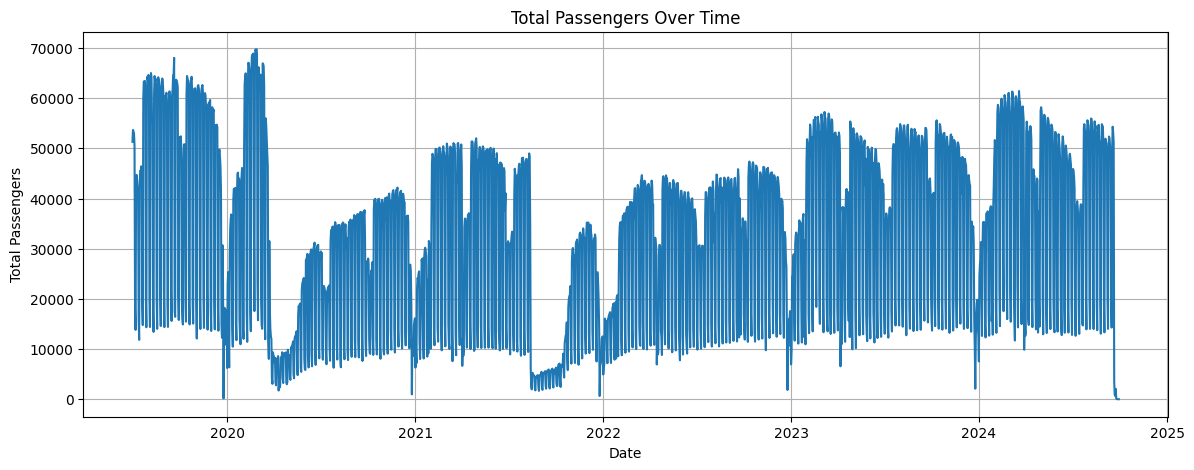

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Total"])
plt.title("Total Passengers Over Time")
plt.xlabel("Date")
plt.ylabel("Total Passengers")
plt.grid(True)
plt.show()


In [13]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 1013 to 160
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1898 non-null   float64       
 7   Total         1918 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 134.9 KB
None
                      Date   Local Route    Light Rail  Peak Service  \
count                 1918   1918.000000   1918.000000   1918.000000   
mean   2022-02-13 12:00:00   9891.395203   7195.446298    179.581335   
min    2019-07-01 00:00:00      1.000000      0.000000      0.000000   
25%    2020-10-22 06:00:00   3044

In [14]:
df.isna().sum()


,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20
Total,0


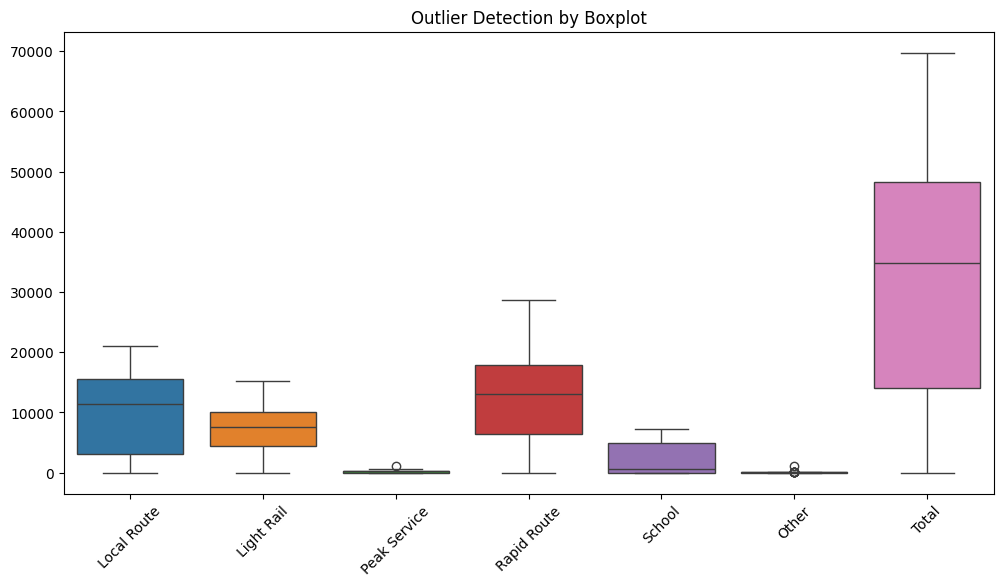

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df[["Local Route","Light Rail","Peak Service","Rapid Route","School","Other","Total"]])
plt.xticks(rotation=45)
plt.title("Outlier Detection by Boxplot")
plt.show()


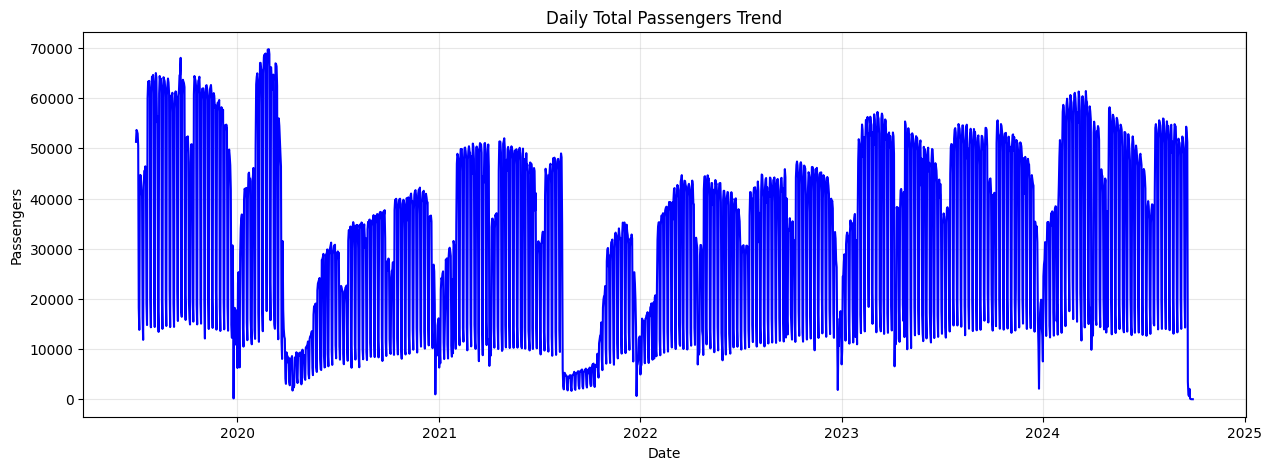

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df["Date"], df["Total"], color="blue")
plt.title("Daily Total Passengers Trend")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.grid(True, alpha=0.3)
plt.show()


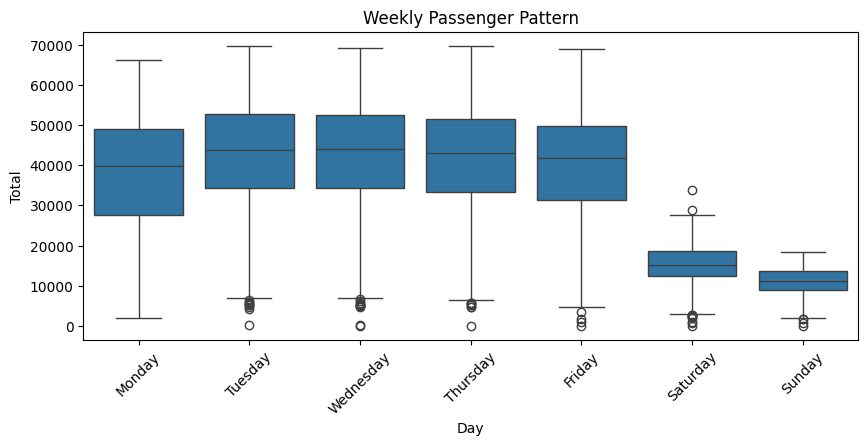

In [17]:
df["Day"] = df["Date"].dt.day_name()

plt.figure(figsize=(10,4))
sns.boxplot(x="Day", y="Total", data=df,
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Weekly Passenger Pattern")
plt.xticks(rotation=45)
plt.show()


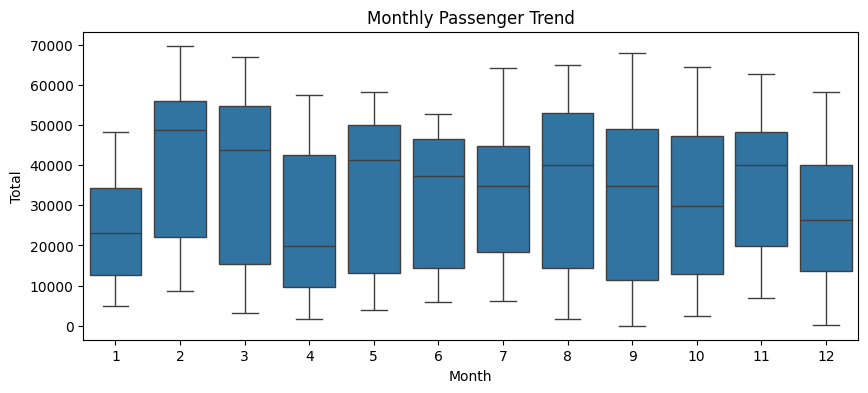

In [18]:
df["Month"] = df["Date"].dt.month

plt.figure(figsize=(10,4))
sns.boxplot(x="Month", y="Total", data=df)
plt.title("Monthly Passenger Trend")
plt.show()


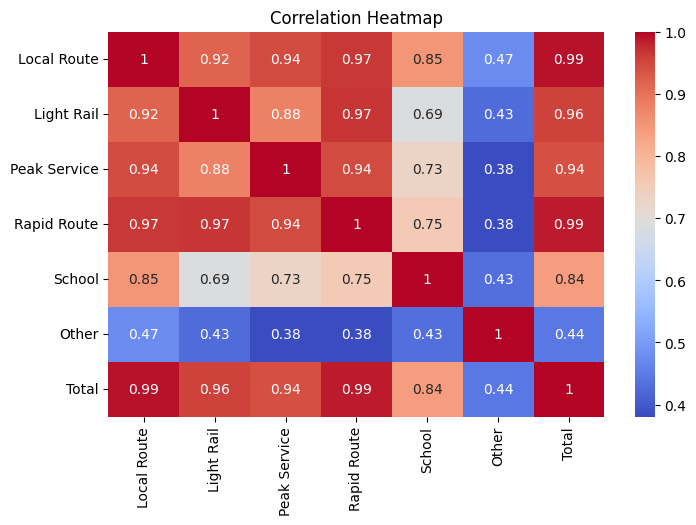

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["Local Route","Light Rail","Peak Service","Rapid Route","School","Other","Total"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


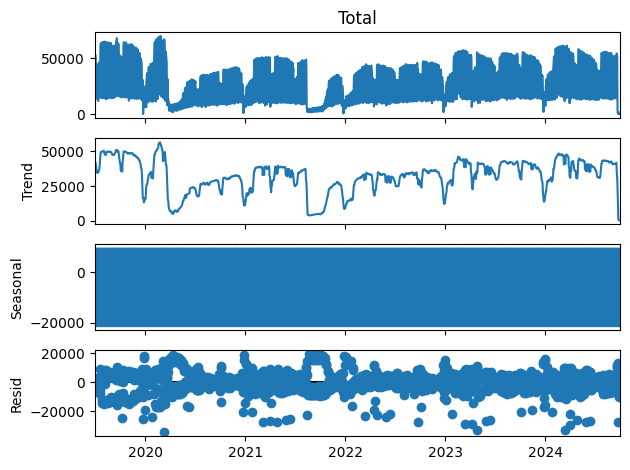

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_ts = df.set_index("Date")["Total"]

result = seasonal_decompose(df_ts, model="additive", period=7)
result.plot()
plt.show()


In [21]:
df["Other"] = df["Other"].fillna(0)
df["Total"] = df[["Local Route","Light Rail","Peak Service","Rapid Route","School","Other"]].sum(axis=1)


In [22]:
df = df.set_index("Date")
df = df.asfreq("D")  # daily frequency
df = df.fillna(method="ffill")  # forward fill missing values


/tmp/ipython-input-891042804.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")  # forward fill missing values


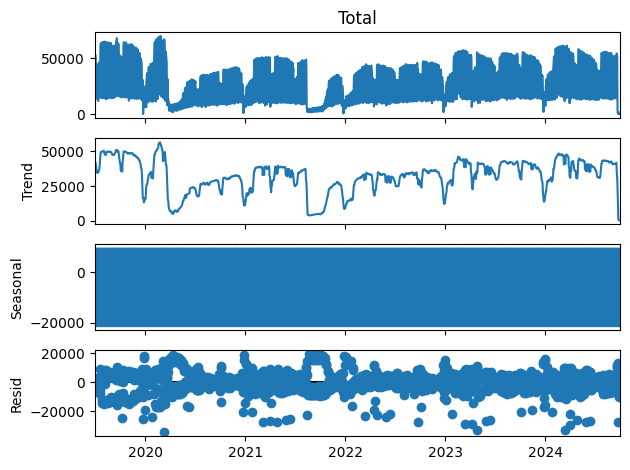

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Total"], model="additive", period=7)
result.plot()
plt.show()


In [24]:
df.index.to_series().diff().value_counts().head(20)


,count
Date,
1 days,1917


In [25]:
df.index.duplicated().sum()


np.int64(0)

In [26]:
print(df.index.min(), df.index.max())
print("Total rows:", len(df))
print("Expected rows if daily:", (df.index.max() - df.index.min()).days + 1)


2019-07-01 00:00:00 2024-09-29 00:00:00
Total rows: 1918
Expected rows if daily: 1918


In [27]:
df.index[:20]


DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
               '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12',
               '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16',
               '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20'],
              dtype='datetime64[ns]', name='Date', freq='D')

In [28]:
df.index.to_series().diff().value_counts().head(10)


,count
Date,
1 days,1917


In [29]:
df["weekday"] = df.index.weekday
df["weekday"].value_counts().sort_index()


,count
weekday,
0,274
1,274
2,274
3,274
4,274
5,274
6,274


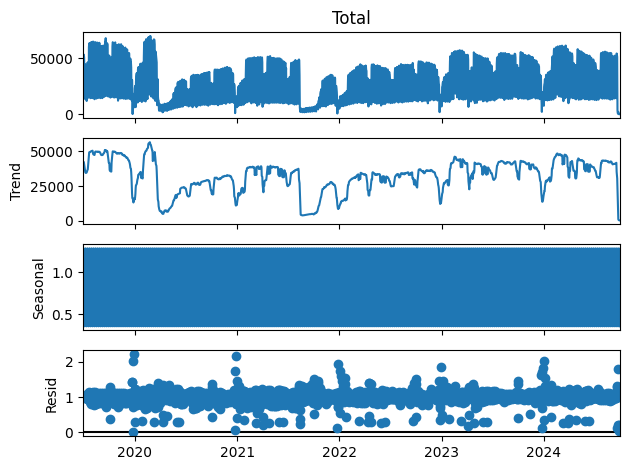

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Total"], model="multiplicative", period=7)
result.plot()
plt.show()


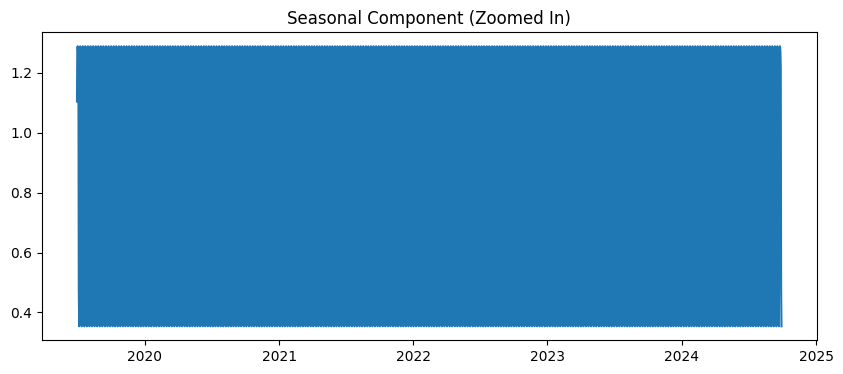

In [31]:
result = seasonal_decompose(df["Total"], model="multiplicative", period=7)

plt.figure(figsize=(10,4))
plt.plot(result.seasonal)
plt.title("Seasonal Component (Zoomed In)")
plt.show()


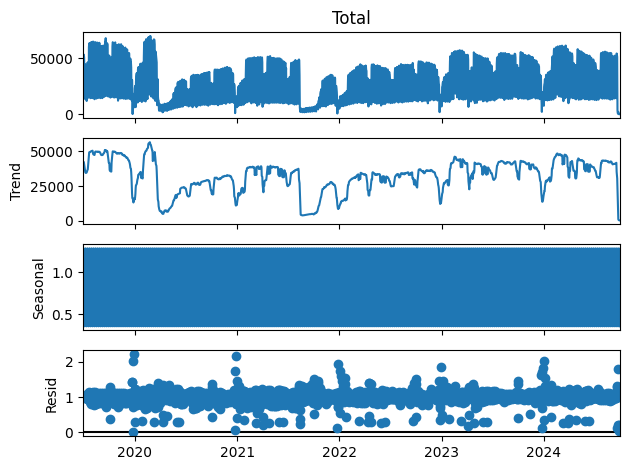

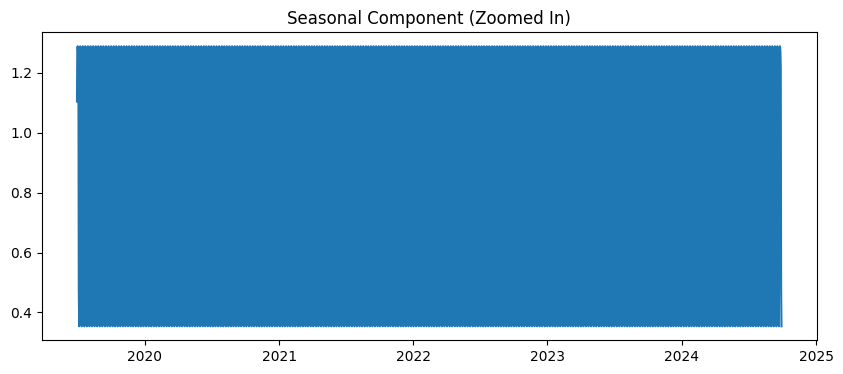

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Total"], model="multiplicative", period=7)
result.plot()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(result.seasonal)
plt.title("Seasonal Component (Zoomed In)")
plt.show()


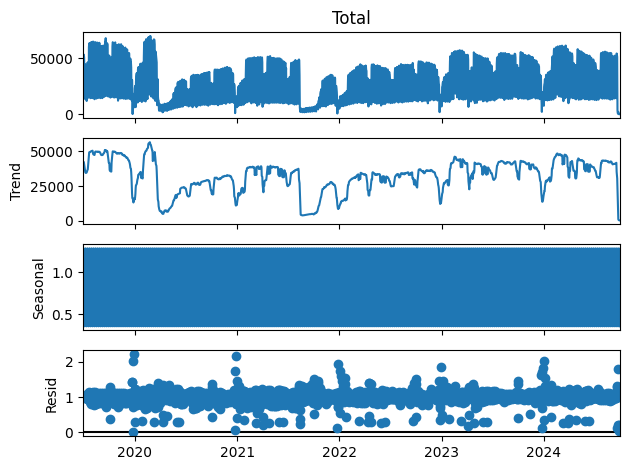

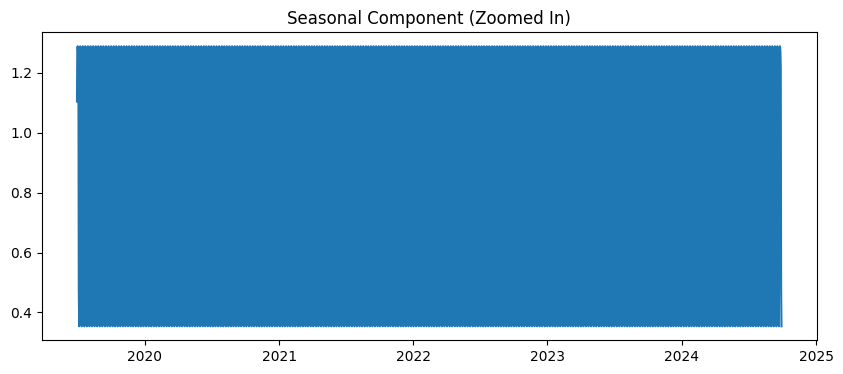

In [33]:



from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Total"], model="multiplicative", period=7)
result.plot()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(result.seasonal)
plt.title("Seasonal Component (Zoomed In)")
plt.show()


In [34]:
ts = df["Total"]


In [35]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])



ADF Statistic: -4.306887195834169
p-value: 0.0004321704100884992


<Figure size 1200x500 with 0 Axes>

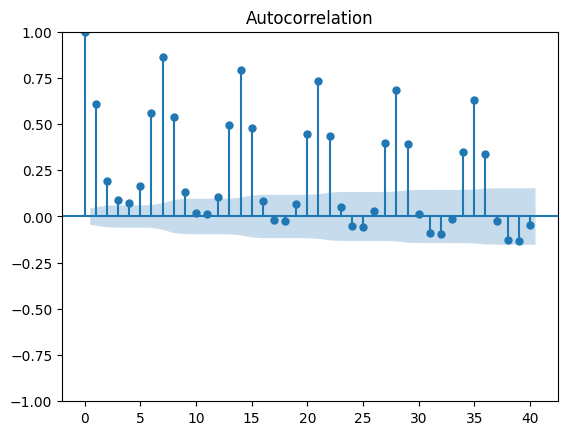

<Figure size 1200x500 with 0 Axes>

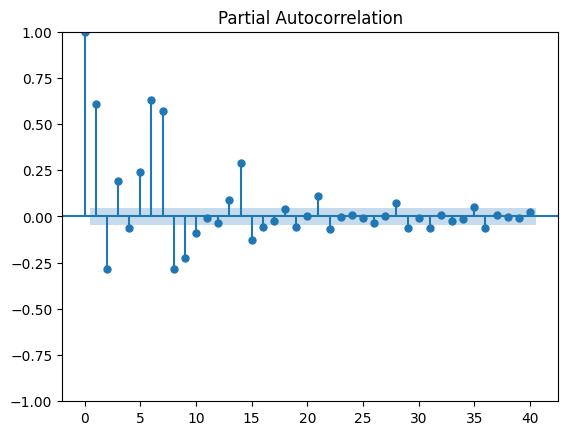

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plot_acf(ts, lags=40)
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(ts, lags=40)
plt.show()


Fitted ARIMA(3, 0, 0)  AIC=41943.65  BIC=41971.44
Fitted ARIMA(3, 0, 1)  AIC=41932.87  BIC=41966.22
Fitted ARIMA(2, 0, 1)  AIC=41938.14  BIC=41965.93
Fitted ARIMA(1, 0, 1)  AIC=41936.22  BIC=41958.46
Fitted ARIMA(0, 0, 1)  AIC=42027.26  BIC=42043.93

BEST by AIC: (3, 0, 1) AIC= 41932.86837538663
                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 1918
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -20960.434
Date:                Sun, 30 Nov 2025   AIC                          41932.868
Time:                        18:16:57   BIC                          41966.223
Sample:                    07-01-2019   HQIC                         41945.141
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025     

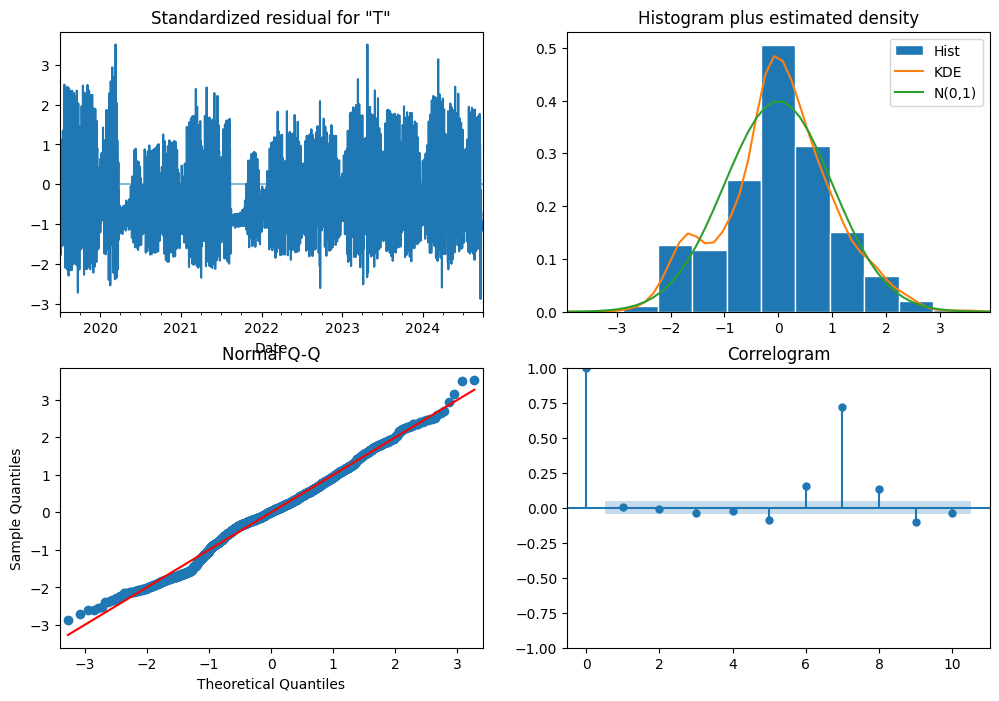


Ljung-Box test on residuals:
         lb_stat      lb_pvalue
10  1123.296223  5.012667e-235
20  2231.201167   0.000000e+00

7-day forecast:
 2024-09-30    13595.693436
2024-10-01    25193.025744
2024-10-02    28649.995908
2024-10-03    29698.595610
2024-10-04    30843.471298
2024-10-05    31618.558614
2024-10-06    31918.061736
Freq: D, Name: predicted_mean, dtype: float64

Confidence intervals:
              lower Total   upper Total
2024-09-30 -12928.136652  40119.523523
2024-10-01  -9690.291939  60076.343426
2024-10-02  -6882.198126  64182.189941
2024-10-03  -5892.597993  65289.789213
2024-10-04  -4817.857456  66504.800052
2024-10-05  -4074.905262  67312.022491
2024-10-06  -3780.201589  67616.325062


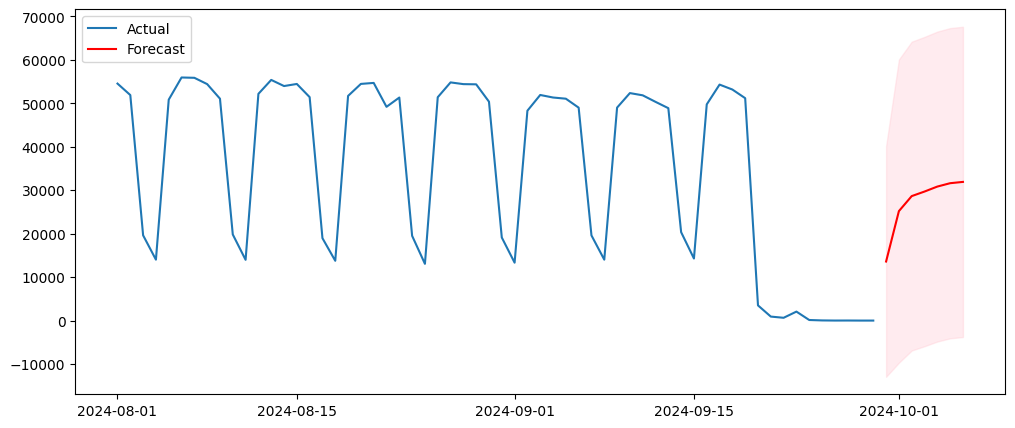

In [37]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# ts is your ts series, indexed by Date, already stationary and d=0
ts = df["Total"]

candidates = [(3,0,0), (3,0,1), (2,0,1), (1,0,1), (0,0,1)]

results = []
for order in candidates:
    try:
        m = ARIMA(ts, order=order)
        res = m.fit()
        results.append((order, res.aic, res.bic, res))
        print(f"Fitted ARIMA{order}  AIC={res.aic:.2f}  BIC={res.bic:.2f}")
    except Exception as e:
        print("FAILED", order, e)

# pick best by AIC
results_sorted = sorted(results, key=lambda x: x[1])
best_order, best_aic, best_bic, best_res = results_sorted[0]
print("\nBEST by AIC:", best_order, "AIC=", best_aic)

# show summary and residual diagnostics for best model
print(best_res.summary())

# Residual diagnostics plot
best_res.plot_diagnostics(figsize=(12,8))
plt.show()

# Ljung-Box test for residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
lb = acorr_ljungbox(best_res.resid.dropna(), lags=[10,20], return_df=True)
print("\nLjung-Box test on residuals:\n", lb)

# Forecast next 7 days
forecast = best_res.get_forecast(steps=7)
fc = forecast.predicted_mean
ci = forecast.conf_int(alpha=0.05)

print("\n7-day forecast:\n", fc)
print("\nConfidence intervals:\n", ci)

# Plot last 60 days + forecast
plt.figure(figsize=(12,5))
plt.plot(ts[-60:], label="Actual")
plt.plot(fc.index, fc.values, label="Forecast", color="red")
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 1918
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -20960.434
Date:                Sun, 30 Nov 2025   AIC                          41932.868
Time:                        18:17:21   BIC                          41966.223
Sample:                    07-01-2019   HQIC                         41945.141
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.226e+04    792.608     40.700      0.000    3.07e+04    3.38e+04
ar.L1          0.5255      0.125      4.218      0.000       0.281       0.770
ar.L2         -0.1940      0.100     -1.935      0.0

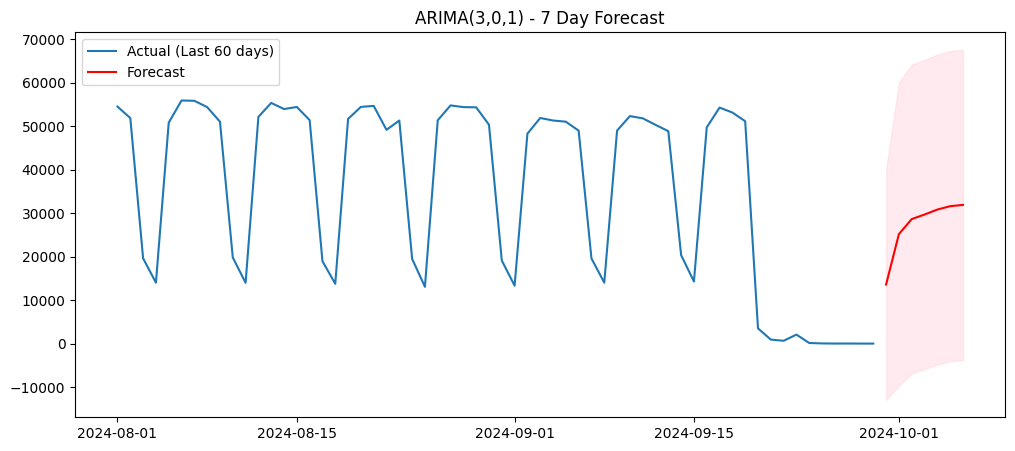

In [38]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

best_model = ARIMA(ts, order=(3,0,1))
best_fit = best_model.fit()

print(best_fit.summary())

# Forecast next 7 days
forecast = best_fit.get_forecast(steps=7)
fc = forecast.predicted_mean
ci = forecast.conf_int()

print("\n7-day forecast:\n", fc)

# Plot
plt.figure(figsize=(12,5))
plt.plot(ts[-60:], label="Actual (Last 60 days)")
plt.plot(fc.index, fc.values, label="Forecast", color="red")
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("ARIMA(3,0,1) - 7 Day Forecast")
plt.legend()
plt.show()


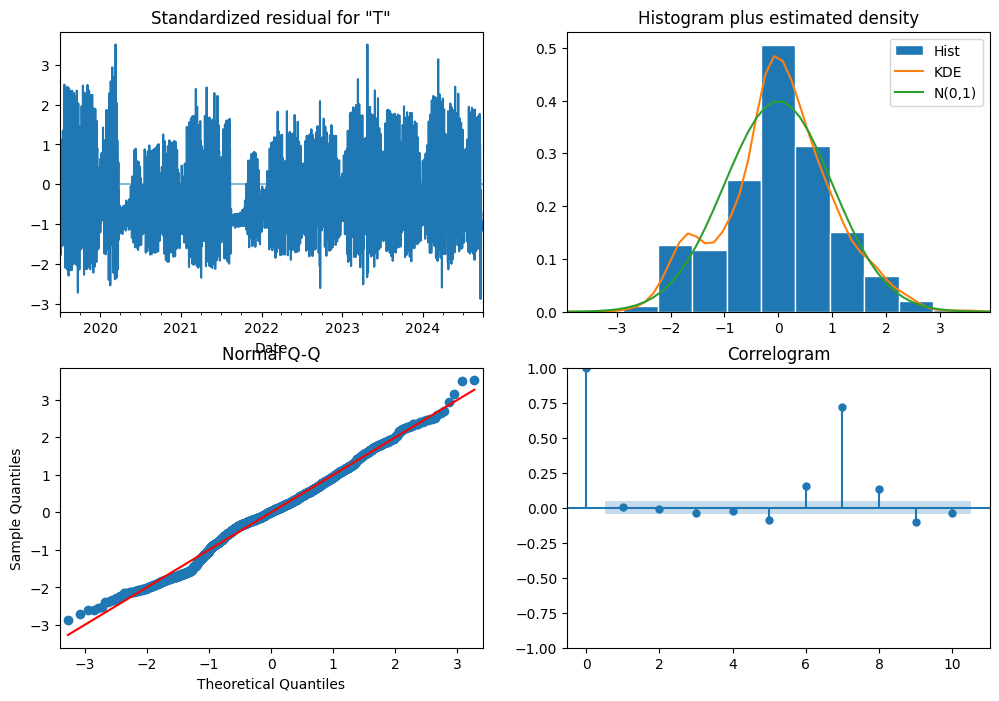

In [39]:
best_fit.plot_diagnostics(figsize=(12,8))
plt.show()


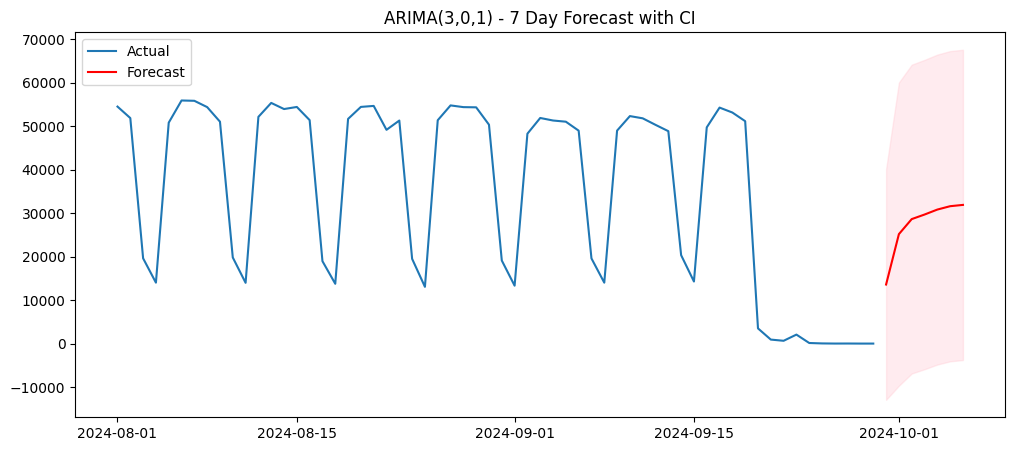

In [40]:
# Forecast plot
fc = forecast.predicted_mean
ci = forecast.conf_int()

plt.figure(figsize=(12,5))
plt.plot(ts[-60:], label="Actual")
plt.plot(fc.index, fc.values, color='red', label='Forecast')
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.title("ARIMA(3,0,1) - 7 Day Forecast with CI")
plt.show()


In [8]:
!ls /content/drive/MyDrive


'1.10 Fiber Optics.gdoc'
'1.2- ACTIVATION FUNCTION (1).gslides'
'1.2- ACTIVATION FUNCTION (2).gslides'
'1.2- ACTIVATION FUNCTION.gslides'
'1.3 -LOSS FUNCTION.gslides'
'1.5 - DEEP LEARNING INTRODUCTION.gslides'
'1.6 - AUTO ENCODER (1).gslides'
'1.6 - AUTO ENCODER (2).gslides'
'1.6 - AUTO ENCODER.gslides'
'1.7 GAN (1).gslides'
'1.7 GAN (2).gslides'
'1.7 GAN.gslides'
'2.1, 2.2 DataLink Layer- Error correction, Stop and Wait Protocol.gslides'
'727822TUAM030 (1).JPG'
'727822tuam030 Edge and Fog.pdf'
 727822TUAM030.JPG
'aadhar card.pdf'
'Adobe Scan 19 Sept 2024_240920_091115.pdf'
'ak new exp 2 (1).gdoc'
'ak new exp 2.gdoc'
'ak new exp 2.pdf'
'Approval Form.gdoc'
'Approval Form.pdf'
'Assigment P&S Template (1).gdoc'
'Assigment P&S Template.gdoc'
'BFS code - python.gdoc'
 BI-20240227-5575424.pdf
'chemistry assignment.pdf'
'Classical Planning in AI (1).gdoc'
'Classical Planning in AI.gdoc'
 Classroom
'CNN2 (1).gslides'
'CNN2 (2).gslides'
'CNN2 (3).gslides'
'CNN2 (4).gslides'
 CNN2.gslides
'Cola

In [41]:
actual = ts[-7:]
print("Actual values:")
print(actual)


Actual values:
Date
2024-09-23    2071.0
2024-09-24     138.0
2024-09-25      40.0
2024-09-26      11.0
2024-09-27      19.0
2024-09-28       5.0
2024-09-29       4.0
Freq: D, Name: Total, dtype: float64


In [42]:


forecast = best_fit.get_forecast(steps=7).predicted_mean
print("Forecasted values:")
print(forecast)


Forecasted values:
2024-09-30    13595.693436
2024-10-01    25193.025744
2024-10-02    28649.995908
2024-10-03    29698.595610
2024-10-04    30843.471298
2024-10-05    31618.558614
2024-10-06    31918.061736
Freq: D, Name: predicted_mean, dtype: float64


In [43]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert to aligned arrays
actual_vals = actual.values
pred_vals = forecast.values

# MAE
mae = mean_absolute_error(actual_vals, pred_vals)

# RMSE
rmse = np.sqrt(mean_squared_error(actual_vals, pred_vals))

# MAPE
mape = np.mean(np.abs((actual_vals - pred_vals) / actual_vals)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE: 27032.77176369225
RMSE: 27847.87893520146
MAPE: 278925.89902131556


In [44]:
accuracy = 100 - mape
print("Accuracy:", accuracy, "%")


Accuracy: -278825.89902131556 %


In [45]:
print("Dataset ends at:", ts.index.max())


Dataset ends at: 2024-09-29 00:00:00
